## 5) Evaluating different models

In the next section, different baseline models are created for the prediction. The best one will then be further tuned to get the best performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import pickle

plt.style.use("seaborn-white")
plt.rcParams["font.size"] = 14
colors = sns.color_palette("Paired")

In [2]:
X_train_res = pd.read_csv(f"X_train_res.csv", index_col = 0)
y_train_res = np.ravel(pd.read_csv(f"y_train_res.csv", index_col = 0))
X_test = pd.read_csv(f"X_test.csv", index_col = 0)
y_test = np.ravel(pd.read_csv(f"y_test.csv", index_col = 0))

### Logistic regression

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       409
           1       0.72      0.72      0.72       409

    accuracy                           0.72       818
   macro avg       0.72      0.72      0.72       818
weighted avg       0.72      0.72      0.72       818

Cross-validation scores: [0.6402439  0.56707317 0.60365854 0.73619632 0.82208589]


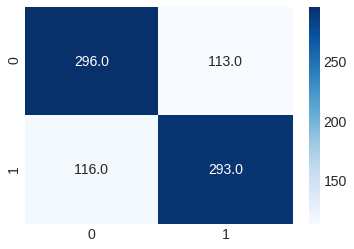

In [3]:
scores = []

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train_res, y_train_res)
pred_logreg = logreg.predict(X_train_res)

cross_val_logreg = cross_val_score(
        logreg,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "accuracy"
    )

scores.append(cross_val_logreg.mean())

print(classification_report(y_train_res, pred_logreg))
print(f"Cross-validation scores: {cross_val_logreg}")

cf = confusion_matrix(y_train_res, pred_logreg)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### KNN

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       409
           1       0.83      0.70      0.76       409

    accuracy                           0.78       818
   macro avg       0.79      0.78      0.78       818
weighted avg       0.79      0.78      0.78       818

Cross-validation scores: [0.69512195 0.63414634 0.68292683 0.70552147 0.73006135]


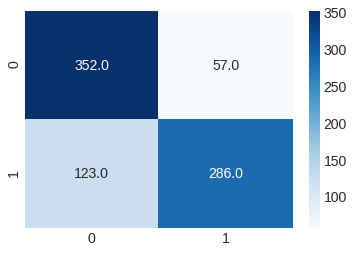

In [4]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_res, y_train_res)
pred_knn = knn.predict(X_train_res)

cross_val_knn = cross_val_score(
        knn,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "accuracy"
    )

scores.append(cross_val_knn.mean())

print(classification_report(y_train_res, pred_knn))
print(f"Cross-validation scores: {cross_val_knn}")

cf = confusion_matrix(y_train_res, pred_knn)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### Naive Bayes

              precision    recall  f1-score   support

           0       0.67      0.72      0.69       409
           1       0.70      0.64      0.67       409

    accuracy                           0.68       818
   macro avg       0.68      0.68      0.68       818
weighted avg       0.68      0.68      0.68       818

Cross-validation scores: [0.62804878 0.62804878 0.62804878 0.65644172 0.76687117]


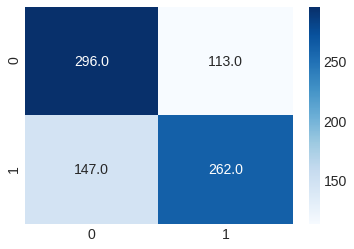

In [5]:
nb = BernoulliNB()

nb.fit(X_train_res, y_train_res)
pred_nb = nb.predict(X_train_res)

cross_val_nb = cross_val_score(
        nb,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "accuracy"
    )

scores.append(cross_val_nb.mean())
print(classification_report(y_train_res, pred_nb))
print(f"Cross-validation scores: {cross_val_nb}")

cf = confusion_matrix(y_train_res, pred_nb)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### SVM: linear and rbf

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       409
           1       0.71      0.79      0.75       409

    accuracy                           0.74       818
   macro avg       0.74      0.74      0.74       818
weighted avg       0.74      0.74      0.74       818

Cross-validation scores: [0.6097561  0.57926829 0.6097561  0.76687117 0.83435583]


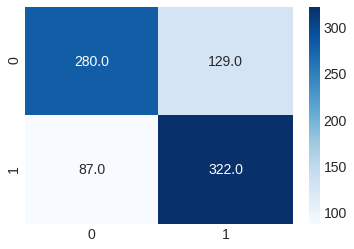

In [6]:
lin_svm = LinearSVC(max_iter = 5000)

lin_svm.fit(X_train_res, y_train_res)
pred_lin_svm = lin_svm.predict(X_train_res)

cross_val_lin_svm = cross_val_score(
        lin_svm,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "accuracy"
    )

scores.append(cross_val_lin_svm.mean())
print(classification_report(y_train_res, pred_lin_svm))
print(f"Cross-validation scores: {cross_val_lin_svm}")

cf = confusion_matrix(y_train_res, pred_lin_svm)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       409
           1       0.79      0.72      0.76       409

    accuracy                           0.77       818
   macro avg       0.77      0.77      0.76       818
weighted avg       0.77      0.77      0.76       818

Cross-validation scores: [0.61585366 0.62804878 0.67682927 0.70552147 0.78527607]


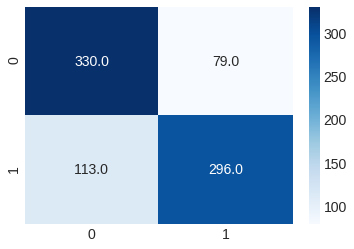

In [7]:
rbf_svm = SVC(kernel='rbf', gamma = "scale")

rbf_svm.fit(X_train_res, y_train_res)
pred_rbf_svm = rbf_svm.predict(X_train_res)

cross_val_rbf_svm = cross_val_score(
        rbf_svm,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "accuracy"
    )

scores.append(cross_val_rbf_svm.mean())
print(classification_report(y_train_res, pred_rbf_svm))
print(f"Cross-validation scores: {cross_val_rbf_svm}")

cf = confusion_matrix(y_train_res, pred_rbf_svm)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       1.00      1.00      1.00       409

    accuracy                           1.00       818
   macro avg       1.00      1.00      1.00       818
weighted avg       1.00      1.00      1.00       818

Mean of cross-validation scores: [0.68902439 0.67682927 0.67073171 0.72392638 0.76687117]


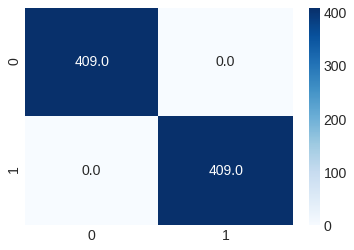

In [8]:
rfc = RandomForestClassifier()

rfc.fit(X_train_res, y_train_res)
pred_rfc = rfc.predict(X_train_res)

cross_val_rfc = cross_val_score(
        rfc,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "accuracy"
    )

scores.append(cross_val_rfc.mean())
print(classification_report(y_train_res, pred_rfc))
print(f"Mean of cross-validation scores: {cross_val_rfc}")

cf = confusion_matrix(y_train_res, pred_rfc)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### XGBoost

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       409
           1       0.99      0.99      0.99       409

    accuracy                           0.99       818
   macro avg       0.99      0.99      0.99       818
weighted avg       0.99      0.99      0.99       818

Mean of cross-validation scores: [0.7195122  0.63414634 0.67682927 0.77300613 0.7607362 ]


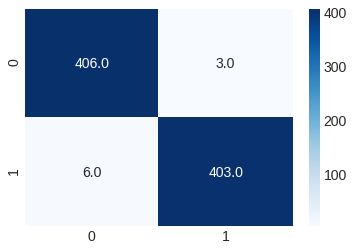

In [9]:
xgb = XGBClassifier()

xgb.fit(X_train_res, y_train_res)
pred_xgb = xgb.predict(X_train_res)

cross_val_xgb = cross_val_score(
        xgb,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "accuracy"
    )

scores.append(cross_val_xgb.mean())
print(classification_report(y_train_res, pred_xgb))
print(f"Mean of cross-validation scores: {cross_val_xgb}")

cf = confusion_matrix(y_train_res, pred_xgb)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### Cat Boost

In [10]:
cat = CatBoostClassifier()

cat.fit(X_train_res, y_train_res)
pred_cat = cat.predict(X_train_res)

cross_val_cat = cross_val_score(
        cat,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "accuracy"
    )

scores.append(cross_val_cat.mean())


Learning rate set to 0.009455
0:	learn: 0.6915774	total: 52.6ms	remaining: 52.6s
1:	learn: 0.6900110	total: 55.4ms	remaining: 27.6s
2:	learn: 0.6884619	total: 57.4ms	remaining: 19.1s
3:	learn: 0.6870018	total: 58.7ms	remaining: 14.6s
4:	learn: 0.6857939	total: 60ms	remaining: 11.9s
5:	learn: 0.6839470	total: 61.3ms	remaining: 10.1s
6:	learn: 0.6827886	total: 62.5ms	remaining: 8.87s
7:	learn: 0.6811673	total: 63.7ms	remaining: 7.9s
8:	learn: 0.6795802	total: 64.9ms	remaining: 7.15s
9:	learn: 0.6783659	total: 66.2ms	remaining: 6.55s
10:	learn: 0.6774097	total: 67.7ms	remaining: 6.09s
11:	learn: 0.6760188	total: 68.8ms	remaining: 5.67s
12:	learn: 0.6747816	total: 70ms	remaining: 5.32s
13:	learn: 0.6732206	total: 71.2ms	remaining: 5.01s
14:	learn: 0.6719082	total: 72.3ms	remaining: 4.75s
15:	learn: 0.6709298	total: 73.4ms	remaining: 4.51s
16:	learn: 0.6695203	total: 74.5ms	remaining: 4.31s
17:	learn: 0.6679073	total: 75.7ms	remaining: 4.13s
18:	learn: 0.6661758	total: 76.8ms	remaining: 3.9

238:	learn: 0.5402473	total: 370ms	remaining: 1.18s
239:	learn: 0.5399291	total: 372ms	remaining: 1.18s
240:	learn: 0.5397499	total: 373ms	remaining: 1.17s
241:	learn: 0.5393862	total: 376ms	remaining: 1.18s
242:	learn: 0.5390607	total: 377ms	remaining: 1.17s
243:	learn: 0.5385572	total: 378ms	remaining: 1.17s
244:	learn: 0.5381838	total: 379ms	remaining: 1.17s
245:	learn: 0.5379101	total: 381ms	remaining: 1.17s
246:	learn: 0.5376854	total: 382ms	remaining: 1.16s
247:	learn: 0.5372663	total: 383ms	remaining: 1.16s
248:	learn: 0.5368933	total: 384ms	remaining: 1.16s
249:	learn: 0.5365371	total: 385ms	remaining: 1.16s
250:	learn: 0.5360619	total: 391ms	remaining: 1.17s
251:	learn: 0.5359145	total: 392ms	remaining: 1.16s
252:	learn: 0.5356020	total: 394ms	remaining: 1.16s
253:	learn: 0.5354332	total: 396ms	remaining: 1.16s
254:	learn: 0.5349334	total: 397ms	remaining: 1.16s
255:	learn: 0.5348207	total: 398ms	remaining: 1.16s
256:	learn: 0.5344926	total: 400ms	remaining: 1.16s
257:	learn: 

527:	learn: 0.4700713	total: 738ms	remaining: 660ms
528:	learn: 0.4699472	total: 740ms	remaining: 659ms
529:	learn: 0.4697449	total: 744ms	remaining: 660ms
530:	learn: 0.4696091	total: 745ms	remaining: 658ms
531:	learn: 0.4694523	total: 747ms	remaining: 657ms
532:	learn: 0.4692024	total: 749ms	remaining: 656ms
533:	learn: 0.4689708	total: 750ms	remaining: 655ms
534:	learn: 0.4686076	total: 755ms	remaining: 656ms
535:	learn: 0.4684606	total: 756ms	remaining: 655ms
536:	learn: 0.4683250	total: 758ms	remaining: 653ms
537:	learn: 0.4682295	total: 759ms	remaining: 652ms
538:	learn: 0.4681241	total: 761ms	remaining: 651ms
539:	learn: 0.4676989	total: 762ms	remaining: 649ms
540:	learn: 0.4674358	total: 764ms	remaining: 648ms
541:	learn: 0.4672171	total: 765ms	remaining: 647ms
542:	learn: 0.4669813	total: 768ms	remaining: 646ms
543:	learn: 0.4668128	total: 770ms	remaining: 645ms
544:	learn: 0.4663953	total: 772ms	remaining: 645ms
545:	learn: 0.4661220	total: 774ms	remaining: 643ms
546:	learn: 

794:	learn: 0.4137282	total: 1.1s	remaining: 285ms
795:	learn: 0.4135510	total: 1.11s	remaining: 284ms
796:	learn: 0.4133943	total: 1.11s	remaining: 283ms
797:	learn: 0.4132181	total: 1.11s	remaining: 282ms
798:	learn: 0.4130042	total: 1.11s	remaining: 280ms
799:	learn: 0.4127596	total: 1.11s	remaining: 279ms
800:	learn: 0.4124981	total: 1.11s	remaining: 277ms
801:	learn: 0.4123513	total: 1.12s	remaining: 276ms
802:	learn: 0.4121817	total: 1.12s	remaining: 275ms
803:	learn: 0.4119720	total: 1.12s	remaining: 274ms
804:	learn: 0.4116864	total: 1.12s	remaining: 272ms
805:	learn: 0.4114596	total: 1.13s	remaining: 271ms
806:	learn: 0.4112976	total: 1.13s	remaining: 270ms
807:	learn: 0.4111413	total: 1.13s	remaining: 269ms
808:	learn: 0.4109551	total: 1.13s	remaining: 267ms
809:	learn: 0.4108689	total: 1.14s	remaining: 266ms
810:	learn: 0.4105977	total: 1.14s	remaining: 266ms
811:	learn: 0.4101932	total: 1.14s	remaining: 265ms
812:	learn: 0.4100558	total: 1.14s	remaining: 263ms
813:	learn: 0

Learning rate set to 0.008594
0:	learn: 0.6920027	total: 3.85ms	remaining: 3.84s
1:	learn: 0.6909684	total: 5.58ms	remaining: 2.79s
2:	learn: 0.6896899	total: 7.31ms	remaining: 2.43s
3:	learn: 0.6881676	total: 8.9ms	remaining: 2.22s
4:	learn: 0.6869396	total: 10.6ms	remaining: 2.1s
5:	learn: 0.6852189	total: 12ms	remaining: 2s
6:	learn: 0.6840447	total: 13.5ms	remaining: 1.92s
7:	learn: 0.6832641	total: 15.1ms	remaining: 1.87s
8:	learn: 0.6819835	total: 16.7ms	remaining: 1.84s
9:	learn: 0.6807974	total: 18.2ms	remaining: 1.8s
10:	learn: 0.6798685	total: 22.4ms	remaining: 2.01s
11:	learn: 0.6784109	total: 24.1ms	remaining: 1.98s
12:	learn: 0.6768692	total: 25.6ms	remaining: 1.94s
13:	learn: 0.6754920	total: 26.9ms	remaining: 1.9s
14:	learn: 0.6743419	total: 28.1ms	remaining: 1.85s
15:	learn: 0.6734078	total: 29.2ms	remaining: 1.8s
16:	learn: 0.6722473	total: 30.2ms	remaining: 1.75s
17:	learn: 0.6707682	total: 31.3ms	remaining: 1.71s
18:	learn: 0.6693573	total: 32.4ms	remaining: 1.67s
19

211:	learn: 0.5500439	total: 365ms	remaining: 1.36s
212:	learn: 0.5497601	total: 375ms	remaining: 1.39s
213:	learn: 0.5494689	total: 376ms	remaining: 1.38s
214:	learn: 0.5490847	total: 378ms	remaining: 1.38s
215:	learn: 0.5486102	total: 380ms	remaining: 1.38s
216:	learn: 0.5481463	total: 382ms	remaining: 1.38s
217:	learn: 0.5478087	total: 385ms	remaining: 1.38s
218:	learn: 0.5472352	total: 387ms	remaining: 1.38s
219:	learn: 0.5469422	total: 399ms	remaining: 1.41s
220:	learn: 0.5467194	total: 409ms	remaining: 1.44s
221:	learn: 0.5464244	total: 414ms	remaining: 1.45s
222:	learn: 0.5460944	total: 415ms	remaining: 1.45s
223:	learn: 0.5455139	total: 417ms	remaining: 1.44s
224:	learn: 0.5451743	total: 421ms	remaining: 1.45s
225:	learn: 0.5447037	total: 423ms	remaining: 1.45s
226:	learn: 0.5441506	total: 424ms	remaining: 1.44s
227:	learn: 0.5438782	total: 429ms	remaining: 1.45s
228:	learn: 0.5434959	total: 430ms	remaining: 1.45s
229:	learn: 0.5431869	total: 432ms	remaining: 1.45s
230:	learn: 

457:	learn: 0.4772519	total: 737ms	remaining: 872ms
458:	learn: 0.4769377	total: 739ms	remaining: 871ms
459:	learn: 0.4767267	total: 740ms	remaining: 869ms
460:	learn: 0.4765557	total: 742ms	remaining: 867ms
461:	learn: 0.4765436	total: 742ms	remaining: 865ms
462:	learn: 0.4762702	total: 744ms	remaining: 862ms
463:	learn: 0.4760441	total: 745ms	remaining: 860ms
464:	learn: 0.4757736	total: 746ms	remaining: 858ms
465:	learn: 0.4754964	total: 747ms	remaining: 856ms
466:	learn: 0.4751973	total: 748ms	remaining: 854ms
467:	learn: 0.4749902	total: 749ms	remaining: 852ms
468:	learn: 0.4748405	total: 750ms	remaining: 849ms
469:	learn: 0.4746952	total: 751ms	remaining: 847ms
470:	learn: 0.4746065	total: 753ms	remaining: 846ms
471:	learn: 0.4743824	total: 754ms	remaining: 844ms
472:	learn: 0.4742279	total: 756ms	remaining: 842ms
473:	learn: 0.4740495	total: 757ms	remaining: 840ms
474:	learn: 0.4736417	total: 758ms	remaining: 838ms
475:	learn: 0.4733665	total: 760ms	remaining: 836ms
476:	learn: 

759:	learn: 0.4119699	total: 1.11s	remaining: 350ms
760:	learn: 0.4117092	total: 1.11s	remaining: 348ms
761:	learn: 0.4115409	total: 1.11s	remaining: 347ms
762:	learn: 0.4112969	total: 1.11s	remaining: 345ms
763:	learn: 0.4109684	total: 1.11s	remaining: 344ms
764:	learn: 0.4107448	total: 1.11s	remaining: 342ms
765:	learn: 0.4105420	total: 1.12s	remaining: 341ms
766:	learn: 0.4103264	total: 1.12s	remaining: 340ms
767:	learn: 0.4100630	total: 1.12s	remaining: 339ms
768:	learn: 0.4098156	total: 1.12s	remaining: 337ms
769:	learn: 0.4096248	total: 1.12s	remaining: 336ms
770:	learn: 0.4094520	total: 1.13s	remaining: 334ms
771:	learn: 0.4093275	total: 1.13s	remaining: 333ms
772:	learn: 0.4091960	total: 1.13s	remaining: 331ms
773:	learn: 0.4088806	total: 1.13s	remaining: 330ms
774:	learn: 0.4085862	total: 1.13s	remaining: 329ms
775:	learn: 0.4084712	total: 1.13s	remaining: 327ms
776:	learn: 0.4082679	total: 1.14s	remaining: 326ms
777:	learn: 0.4080216	total: 1.14s	remaining: 325ms
778:	learn: 

Learning rate set to 0.008594
0:	learn: 0.6919618	total: 1.45ms	remaining: 1.45s
1:	learn: 0.6905559	total: 2.87ms	remaining: 1.43s
2:	learn: 0.6892023	total: 4.38ms	remaining: 1.46s
3:	learn: 0.6874574	total: 5.51ms	remaining: 1.37s
4:	learn: 0.6866963	total: 7.23ms	remaining: 1.44s
5:	learn: 0.6851959	total: 8.88ms	remaining: 1.47s
6:	learn: 0.6838989	total: 12.6ms	remaining: 1.79s
7:	learn: 0.6822941	total: 14.7ms	remaining: 1.82s
8:	learn: 0.6809830	total: 16.2ms	remaining: 1.78s
9:	learn: 0.6797327	total: 19.7ms	remaining: 1.95s
10:	learn: 0.6786697	total: 21.4ms	remaining: 1.92s
11:	learn: 0.6770853	total: 25.9ms	remaining: 2.13s
12:	learn: 0.6757824	total: 27.9ms	remaining: 2.12s
13:	learn: 0.6743057	total: 31.3ms	remaining: 2.2s
14:	learn: 0.6734360	total: 32.7ms	remaining: 2.15s
15:	learn: 0.6721165	total: 34.2ms	remaining: 2.1s
16:	learn: 0.6711067	total: 35.6ms	remaining: 2.06s
17:	learn: 0.6695016	total: 38ms	remaining: 2.07s
18:	learn: 0.6683487	total: 42.1ms	remaining: 2.

193:	learn: 0.5523709	total: 366ms	remaining: 1.52s
194:	learn: 0.5520384	total: 370ms	remaining: 1.53s
195:	learn: 0.5514900	total: 375ms	remaining: 1.54s
196:	learn: 0.5510684	total: 377ms	remaining: 1.54s
197:	learn: 0.5506900	total: 378ms	remaining: 1.53s
198:	learn: 0.5504743	total: 380ms	remaining: 1.53s
199:	learn: 0.5501837	total: 381ms	remaining: 1.52s
200:	learn: 0.5499387	total: 383ms	remaining: 1.52s
201:	learn: 0.5495514	total: 384ms	remaining: 1.52s
202:	learn: 0.5491518	total: 389ms	remaining: 1.52s
203:	learn: 0.5488139	total: 391ms	remaining: 1.53s
204:	learn: 0.5483373	total: 393ms	remaining: 1.52s
205:	learn: 0.5479555	total: 394ms	remaining: 1.52s
206:	learn: 0.5476454	total: 397ms	remaining: 1.52s
207:	learn: 0.5472920	total: 399ms	remaining: 1.52s
208:	learn: 0.5470761	total: 400ms	remaining: 1.51s
209:	learn: 0.5465181	total: 401ms	remaining: 1.51s
210:	learn: 0.5461643	total: 403ms	remaining: 1.51s
211:	learn: 0.5456595	total: 405ms	remaining: 1.5s
212:	learn: 0

432:	learn: 0.4809344	total: 733ms	remaining: 960ms
433:	learn: 0.4806781	total: 738ms	remaining: 962ms
434:	learn: 0.4803851	total: 739ms	remaining: 960ms
435:	learn: 0.4801032	total: 741ms	remaining: 958ms
436:	learn: 0.4798563	total: 742ms	remaining: 956ms
437:	learn: 0.4797024	total: 743ms	remaining: 954ms
438:	learn: 0.4794834	total: 745ms	remaining: 952ms
439:	learn: 0.4790431	total: 746ms	remaining: 950ms
440:	learn: 0.4786958	total: 754ms	remaining: 956ms
441:	learn: 0.4783849	total: 756ms	remaining: 955ms
442:	learn: 0.4781957	total: 758ms	remaining: 953ms
443:	learn: 0.4778778	total: 761ms	remaining: 954ms
444:	learn: 0.4776262	total: 763ms	remaining: 952ms
445:	learn: 0.4774392	total: 765ms	remaining: 951ms
446:	learn: 0.4771989	total: 769ms	remaining: 951ms
447:	learn: 0.4769538	total: 771ms	remaining: 950ms
448:	learn: 0.4767429	total: 773ms	remaining: 948ms
449:	learn: 0.4765309	total: 775ms	remaining: 947ms
450:	learn: 0.4761885	total: 776ms	remaining: 944ms
451:	learn: 

714:	learn: 0.4178661	total: 1.11s	remaining: 442ms
715:	learn: 0.4175669	total: 1.11s	remaining: 440ms
716:	learn: 0.4172379	total: 1.11s	remaining: 438ms
717:	learn: 0.4171433	total: 1.11s	remaining: 437ms
718:	learn: 0.4169531	total: 1.11s	remaining: 435ms
719:	learn: 0.4168363	total: 1.11s	remaining: 433ms
720:	learn: 0.4166233	total: 1.11s	remaining: 432ms
721:	learn: 0.4162901	total: 1.12s	remaining: 430ms
722:	learn: 0.4161886	total: 1.12s	remaining: 429ms
723:	learn: 0.4159725	total: 1.12s	remaining: 427ms
724:	learn: 0.4156235	total: 1.12s	remaining: 425ms
725:	learn: 0.4152380	total: 1.12s	remaining: 424ms
726:	learn: 0.4150247	total: 1.13s	remaining: 423ms
727:	learn: 0.4148594	total: 1.13s	remaining: 421ms
728:	learn: 0.4146439	total: 1.13s	remaining: 420ms
729:	learn: 0.4144220	total: 1.13s	remaining: 418ms
730:	learn: 0.4141099	total: 1.13s	remaining: 417ms
731:	learn: 0.4140021	total: 1.13s	remaining: 415ms
732:	learn: 0.4139108	total: 1.14s	remaining: 414ms
733:	learn: 

Learning rate set to 0.008594
0:	learn: 0.6922595	total: 8.87ms	remaining: 8.86s
1:	learn: 0.6915434	total: 10.6ms	remaining: 5.31s
2:	learn: 0.6900499	total: 12.4ms	remaining: 4.13s
3:	learn: 0.6885281	total: 14.6ms	remaining: 3.64s
4:	learn: 0.6874095	total: 16.8ms	remaining: 3.35s
5:	learn: 0.6854480	total: 18.6ms	remaining: 3.09s
6:	learn: 0.6845323	total: 20.4ms	remaining: 2.89s
7:	learn: 0.6834190	total: 22.9ms	remaining: 2.84s
8:	learn: 0.6817950	total: 24.5ms	remaining: 2.7s
9:	learn: 0.6801509	total: 26.1ms	remaining: 2.58s
10:	learn: 0.6792263	total: 27.5ms	remaining: 2.47s
11:	learn: 0.6782888	total: 28.4ms	remaining: 2.34s
12:	learn: 0.6771478	total: 29.8ms	remaining: 2.26s
13:	learn: 0.6759592	total: 31.3ms	remaining: 2.2s
14:	learn: 0.6755623	total: 33.3ms	remaining: 2.19s
15:	learn: 0.6744722	total: 34.8ms	remaining: 2.14s
16:	learn: 0.6733210	total: 36.4ms	remaining: 2.11s
17:	learn: 0.6720860	total: 37.8ms	remaining: 2.06s
18:	learn: 0.6709553	total: 39.2ms	remaining: 

274:	learn: 0.5312397	total: 380ms	remaining: 1s
275:	learn: 0.5311253	total: 381ms	remaining: 1s
276:	learn: 0.5308242	total: 390ms	remaining: 1.02s
277:	learn: 0.5306163	total: 391ms	remaining: 1.02s
278:	learn: 0.5302219	total: 394ms	remaining: 1.02s
279:	learn: 0.5299768	total: 395ms	remaining: 1.01s
280:	learn: 0.5298254	total: 396ms	remaining: 1.01s
281:	learn: 0.5295152	total: 398ms	remaining: 1.01s
282:	learn: 0.5294221	total: 399ms	remaining: 1.01s
283:	learn: 0.5290084	total: 401ms	remaining: 1.01s
284:	learn: 0.5288019	total: 402ms	remaining: 1.01s
285:	learn: 0.5285497	total: 404ms	remaining: 1.01s
286:	learn: 0.5282836	total: 405ms	remaining: 1s
287:	learn: 0.5279250	total: 406ms	remaining: 1s
288:	learn: 0.5277637	total: 407ms	remaining: 1s
289:	learn: 0.5275101	total: 408ms	remaining: 999ms
290:	learn: 0.5273572	total: 409ms	remaining: 997ms
291:	learn: 0.5269884	total: 410ms	remaining: 995ms
292:	learn: 0.5269176	total: 411ms	remaining: 992ms
293:	learn: 0.5266314	total

579:	learn: 0.4606793	total: 747ms	remaining: 541ms
580:	learn: 0.4605231	total: 749ms	remaining: 540ms
581:	learn: 0.4603317	total: 752ms	remaining: 540ms
582:	learn: 0.4600389	total: 753ms	remaining: 539ms
583:	learn: 0.4597372	total: 754ms	remaining: 537ms
584:	learn: 0.4595878	total: 755ms	remaining: 536ms
585:	learn: 0.4594000	total: 757ms	remaining: 535ms
586:	learn: 0.4591493	total: 758ms	remaining: 533ms
587:	learn: 0.4588534	total: 759ms	remaining: 532ms
588:	learn: 0.4587154	total: 760ms	remaining: 530ms
589:	learn: 0.4585293	total: 761ms	remaining: 529ms
590:	learn: 0.4585052	total: 762ms	remaining: 527ms
591:	learn: 0.4583456	total: 764ms	remaining: 526ms
592:	learn: 0.4581949	total: 765ms	remaining: 525ms
593:	learn: 0.4578915	total: 766ms	remaining: 524ms
594:	learn: 0.4576790	total: 768ms	remaining: 523ms
595:	learn: 0.4575180	total: 769ms	remaining: 521ms
596:	learn: 0.4570746	total: 771ms	remaining: 520ms
597:	learn: 0.4569130	total: 772ms	remaining: 519ms
598:	learn: 

878:	learn: 0.3994823	total: 1.11s	remaining: 153ms
879:	learn: 0.3991398	total: 1.12s	remaining: 152ms
880:	learn: 0.3989502	total: 1.12s	remaining: 151ms
881:	learn: 0.3987298	total: 1.12s	remaining: 150ms
882:	learn: 0.3983658	total: 1.12s	remaining: 149ms
883:	learn: 0.3981309	total: 1.12s	remaining: 147ms
884:	learn: 0.3979495	total: 1.12s	remaining: 146ms
885:	learn: 0.3976558	total: 1.13s	remaining: 145ms
886:	learn: 0.3973743	total: 1.13s	remaining: 144ms
887:	learn: 0.3969350	total: 1.13s	remaining: 142ms
888:	learn: 0.3967734	total: 1.13s	remaining: 141ms
889:	learn: 0.3965733	total: 1.13s	remaining: 140ms
890:	learn: 0.3964222	total: 1.13s	remaining: 139ms
891:	learn: 0.3961580	total: 1.13s	remaining: 137ms
892:	learn: 0.3957289	total: 1.14s	remaining: 136ms
893:	learn: 0.3955090	total: 1.14s	remaining: 135ms
894:	learn: 0.3953915	total: 1.14s	remaining: 134ms
895:	learn: 0.3952320	total: 1.14s	remaining: 132ms
896:	learn: 0.3949155	total: 1.14s	remaining: 131ms
897:	learn: 

104:	learn: 0.5967141	total: 189ms	remaining: 1.61s
105:	learn: 0.5962050	total: 190ms	remaining: 1.61s
106:	learn: 0.5953562	total: 193ms	remaining: 1.61s
107:	learn: 0.5949805	total: 195ms	remaining: 1.61s
108:	learn: 0.5943190	total: 196ms	remaining: 1.6s
109:	learn: 0.5935661	total: 200ms	remaining: 1.61s
110:	learn: 0.5930270	total: 201ms	remaining: 1.61s
111:	learn: 0.5924509	total: 203ms	remaining: 1.6s
112:	learn: 0.5914726	total: 204ms	remaining: 1.6s
113:	learn: 0.5907315	total: 205ms	remaining: 1.59s
114:	learn: 0.5903152	total: 207ms	remaining: 1.59s
115:	learn: 0.5895951	total: 208ms	remaining: 1.59s
116:	learn: 0.5892092	total: 210ms	remaining: 1.58s
117:	learn: 0.5888528	total: 211ms	remaining: 1.58s
118:	learn: 0.5882993	total: 212ms	remaining: 1.57s
119:	learn: 0.5875224	total: 215ms	remaining: 1.57s
120:	learn: 0.5873375	total: 218ms	remaining: 1.58s
121:	learn: 0.5868852	total: 220ms	remaining: 1.58s
122:	learn: 0.5864859	total: 222ms	remaining: 1.58s
123:	learn: 0.5

351:	learn: 0.5068234	total: 554ms	remaining: 1.02s
352:	learn: 0.5066493	total: 556ms	remaining: 1.02s
353:	learn: 0.5064498	total: 557ms	remaining: 1.02s
354:	learn: 0.5058528	total: 559ms	remaining: 1.01s
355:	learn: 0.5056282	total: 561ms	remaining: 1.01s
356:	learn: 0.5054908	total: 562ms	remaining: 1.01s
357:	learn: 0.5050301	total: 563ms	remaining: 1.01s
358:	learn: 0.5049037	total: 564ms	remaining: 1.01s
359:	learn: 0.5046414	total: 566ms	remaining: 1s
360:	learn: 0.5044184	total: 567ms	remaining: 1s
361:	learn: 0.5040223	total: 569ms	remaining: 1s
362:	learn: 0.5037865	total: 572ms	remaining: 1s
363:	learn: 0.5033576	total: 576ms	remaining: 1.01s
364:	learn: 0.5032229	total: 578ms	remaining: 1.01s
365:	learn: 0.5030422	total: 580ms	remaining: 1s
366:	learn: 0.5028203	total: 581ms	remaining: 1s
367:	learn: 0.5026000	total: 583ms	remaining: 1s
368:	learn: 0.5023098	total: 585ms	remaining: 1s
369:	learn: 0.5022975	total: 586ms	remaining: 998ms
370:	learn: 0.5020638	total: 588ms	r

605:	learn: 0.4525932	total: 927ms	remaining: 603ms
606:	learn: 0.4524909	total: 931ms	remaining: 603ms
607:	learn: 0.4521920	total: 937ms	remaining: 604ms
608:	learn: 0.4520698	total: 947ms	remaining: 608ms
609:	learn: 0.4518767	total: 949ms	remaining: 607ms
610:	learn: 0.4516767	total: 950ms	remaining: 605ms
611:	learn: 0.4514802	total: 952ms	remaining: 604ms
612:	learn: 0.4513949	total: 953ms	remaining: 602ms
613:	learn: 0.4512678	total: 956ms	remaining: 601ms
614:	learn: 0.4510897	total: 958ms	remaining: 600ms
615:	learn: 0.4509996	total: 960ms	remaining: 598ms
616:	learn: 0.4509448	total: 961ms	remaining: 597ms
617:	learn: 0.4506148	total: 963ms	remaining: 595ms
618:	learn: 0.4504691	total: 964ms	remaining: 593ms
619:	learn: 0.4503724	total: 965ms	remaining: 592ms
620:	learn: 0.4499469	total: 967ms	remaining: 590ms
621:	learn: 0.4497613	total: 968ms	remaining: 588ms
622:	learn: 0.4496934	total: 969ms	remaining: 587ms
623:	learn: 0.4496786	total: 971ms	remaining: 585ms
624:	learn: 

861:	learn: 0.4012910	total: 1.3s	remaining: 208ms
862:	learn: 0.4010973	total: 1.3s	remaining: 206ms
863:	learn: 0.4008151	total: 1.3s	remaining: 205ms
864:	learn: 0.4005195	total: 1.3s	remaining: 203ms
865:	learn: 0.4002771	total: 1.3s	remaining: 202ms
866:	learn: 0.3999948	total: 1.3s	remaining: 200ms
867:	learn: 0.3998330	total: 1.31s	remaining: 199ms
868:	learn: 0.3996269	total: 1.31s	remaining: 197ms
869:	learn: 0.3995227	total: 1.31s	remaining: 196ms
870:	learn: 0.3993968	total: 1.31s	remaining: 194ms
871:	learn: 0.3991346	total: 1.31s	remaining: 192ms
872:	learn: 0.3987979	total: 1.31s	remaining: 191ms
873:	learn: 0.3985561	total: 1.31s	remaining: 190ms
874:	learn: 0.3982495	total: 1.32s	remaining: 188ms
875:	learn: 0.3981317	total: 1.32s	remaining: 187ms
876:	learn: 0.3978383	total: 1.32s	remaining: 185ms
877:	learn: 0.3977415	total: 1.32s	remaining: 184ms
878:	learn: 0.3974382	total: 1.32s	remaining: 182ms
879:	learn: 0.3973185	total: 1.32s	remaining: 181ms
880:	learn: 0.3971

35:	learn: 0.6556731	total: 141ms	remaining: 3.78s
36:	learn: 0.6549006	total: 150ms	remaining: 3.9s
37:	learn: 0.6539814	total: 160ms	remaining: 4.05s
38:	learn: 0.6531310	total: 163ms	remaining: 4.01s
39:	learn: 0.6522009	total: 165ms	remaining: 3.95s
40:	learn: 0.6510955	total: 166ms	remaining: 3.89s
41:	learn: 0.6504461	total: 185ms	remaining: 4.22s
42:	learn: 0.6496117	total: 197ms	remaining: 4.39s
43:	learn: 0.6487838	total: 198ms	remaining: 4.31s
44:	learn: 0.6478877	total: 199ms	remaining: 4.23s
45:	learn: 0.6471487	total: 207ms	remaining: 4.3s
46:	learn: 0.6462294	total: 210ms	remaining: 4.26s
47:	learn: 0.6457725	total: 211ms	remaining: 4.19s
48:	learn: 0.6452850	total: 213ms	remaining: 4.13s
49:	learn: 0.6447239	total: 214ms	remaining: 4.07s
50:	learn: 0.6438773	total: 221ms	remaining: 4.1s
51:	learn: 0.6432370	total: 225ms	remaining: 4.1s
52:	learn: 0.6426224	total: 226ms	remaining: 4.04s
53:	learn: 0.6418728	total: 228ms	remaining: 3.99s
54:	learn: 0.6411019	total: 234ms	r

234:	learn: 0.5612249	total: 521ms	remaining: 1.7s
235:	learn: 0.5608716	total: 525ms	remaining: 1.7s
236:	learn: 0.5602824	total: 527ms	remaining: 1.7s
237:	learn: 0.5598942	total: 528ms	remaining: 1.69s
238:	learn: 0.5596687	total: 529ms	remaining: 1.68s
239:	learn: 0.5595688	total: 530ms	remaining: 1.68s
240:	learn: 0.5591202	total: 531ms	remaining: 1.67s
241:	learn: 0.5587114	total: 532ms	remaining: 1.67s
242:	learn: 0.5583769	total: 538ms	remaining: 1.68s
243:	learn: 0.5579650	total: 540ms	remaining: 1.67s
244:	learn: 0.5574457	total: 542ms	remaining: 1.67s
245:	learn: 0.5572399	total: 545ms	remaining: 1.67s
246:	learn: 0.5568577	total: 546ms	remaining: 1.67s
247:	learn: 0.5565519	total: 547ms	remaining: 1.66s
248:	learn: 0.5563400	total: 549ms	remaining: 1.66s
249:	learn: 0.5558689	total: 551ms	remaining: 1.65s
250:	learn: 0.5556941	total: 555ms	remaining: 1.66s
251:	learn: 0.5553172	total: 557ms	remaining: 1.65s
252:	learn: 0.5550075	total: 558ms	remaining: 1.65s
253:	learn: 0.5

527:	learn: 0.4927816	total: 896ms	remaining: 801ms
528:	learn: 0.4927772	total: 897ms	remaining: 798ms
529:	learn: 0.4925624	total: 898ms	remaining: 796ms
530:	learn: 0.4923998	total: 900ms	remaining: 795ms
531:	learn: 0.4921423	total: 901ms	remaining: 793ms
532:	learn: 0.4919409	total: 903ms	remaining: 791ms
533:	learn: 0.4917144	total: 904ms	remaining: 789ms
534:	learn: 0.4915582	total: 906ms	remaining: 787ms
535:	learn: 0.4912072	total: 907ms	remaining: 785ms
536:	learn: 0.4910323	total: 908ms	remaining: 783ms
537:	learn: 0.4908739	total: 910ms	remaining: 781ms
538:	learn: 0.4906709	total: 911ms	remaining: 779ms
539:	learn: 0.4904703	total: 913ms	remaining: 778ms
540:	learn: 0.4903142	total: 914ms	remaining: 776ms
541:	learn: 0.4902410	total: 917ms	remaining: 775ms
542:	learn: 0.4901502	total: 919ms	remaining: 773ms
543:	learn: 0.4898580	total: 920ms	remaining: 772ms
544:	learn: 0.4896613	total: 922ms	remaining: 770ms
545:	learn: 0.4894314	total: 923ms	remaining: 768ms
546:	learn: 

818:	learn: 0.4356745	total: 1.26s	remaining: 279ms
819:	learn: 0.4354793	total: 1.26s	remaining: 277ms
820:	learn: 0.4353626	total: 1.26s	remaining: 276ms
821:	learn: 0.4351939	total: 1.27s	remaining: 274ms
822:	learn: 0.4349692	total: 1.27s	remaining: 273ms
823:	learn: 0.4347576	total: 1.27s	remaining: 271ms
824:	learn: 0.4345029	total: 1.27s	remaining: 269ms
825:	learn: 0.4342371	total: 1.27s	remaining: 268ms
826:	learn: 0.4340746	total: 1.27s	remaining: 267ms
827:	learn: 0.4338634	total: 1.28s	remaining: 265ms
828:	learn: 0.4335925	total: 1.28s	remaining: 263ms
829:	learn: 0.4333794	total: 1.28s	remaining: 262ms
830:	learn: 0.4332682	total: 1.28s	remaining: 260ms
831:	learn: 0.4331923	total: 1.28s	remaining: 259ms
832:	learn: 0.4328807	total: 1.28s	remaining: 257ms
833:	learn: 0.4327998	total: 1.28s	remaining: 256ms
834:	learn: 0.4326071	total: 1.29s	remaining: 254ms
835:	learn: 0.4323261	total: 1.29s	remaining: 253ms
836:	learn: 0.4321437	total: 1.29s	remaining: 251ms
837:	learn: 

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       409
           1       0.94      0.82      0.88       409

    accuracy                           0.88       818
   macro avg       0.89      0.88      0.88       818
weighted avg       0.89      0.88      0.88       818

Mean of cross-validation scores: [0.70121951 0.65853659 0.70731707 0.71165644 0.79141104]


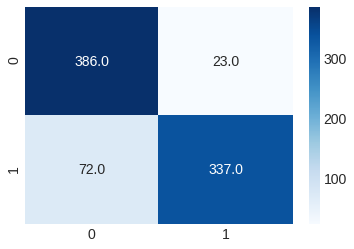

In [11]:
print(classification_report(y_train_res, pred_cat))
print(f"Mean of cross-validation scores: {cross_val_cat}")
cf = confusion_matrix(y_train_res, pred_cat)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### Comparison of baseline models

The highest score is: 0.7140281310788568 from the model: cat.


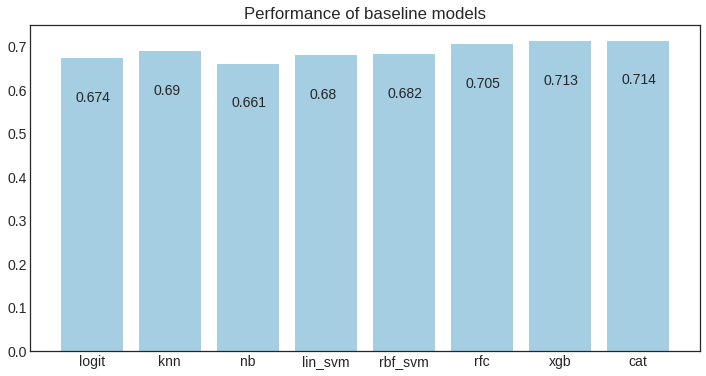

In [12]:
models = ["logit", "knn", "nb", "lin_svm", "rbf_svm", "rfc", "xgb", "cat"]

fig, ax = plt.subplots(figsize = (12, 6))
plt.bar(models, scores, color = colors[0]);
for index, data in enumerate(scores):
    plt.text(x = index - 0.21, y = data - 0.1, s = f"{round(data, 3)}", fontdict=dict(fontsize=14))
plt.title("Performance of baseline models");
print(
    f"The highest score is: {np.max(scores)} from the model: {models[scores.index(np.max(scores))]}."
)

Based on this quick evaluation of untuned baseline models, we will carry on with the Random Forest Model to find the best parameters and achieve even better predictions.

In [13]:
filename = 'rfc_model.sav'
pickle.dump(rfc, open(filename, 'wb'))